In [1]:
# Base
import pandas as pd 
import numpy as np 

# Object detector
from object_detector import *

import matplotlib.pyplot as plt
%matplotlib inline 

model_path = "../models/craters_VGG.model"

#=========================================================================================================
#================================ 1. DATA

Xtrain = np.load('../data/data_train.npy')
Ytrain = pd.read_csv('../data/labels_train.csv').values

# Keeping only pictures that includes a crater for training
with_crater = np.isin(np.arange(Xtrain.shape[0]), np.unique(Ytrain[:, 0]))
Xtrain = Xtrain[with_crater]

# Keeping y index coherent
replace = dict([(k, v) for k, v in zip(np.unique(Ytrain[:, 0]), np.arange(Ytrain.shape[0]))])
Ytrain[:, 0] = [replace[i] for i in Ytrain[:, 0]]

In [2]:
batches = CraterDataset(Xtrain, BATCH_SIZE, Ytrain)

In [3]:
for X, idx in batches.loader:
    break

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f3bbcc601d0>>
Traceback (most recent call last):
  File "/home/hugoperrin/anaconda3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/hugoperrin/anaconda3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/hugoperrin/anaconda3/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/hugoperrin/anaconda3/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/hugoperrin/anaconda3/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/hugoperrin/anaconda3/lib/python3.5/multiprocessing/resourc

In [35]:
image_idx = 7

In [36]:
current_label_idx = idx[image_idx]

In [37]:
transform = Grayscale(num_output_channels=1)
to_image = ToPILImage()
to_tensor = ToTensor()

to_plot = to_tensor(transform(to_image(X[image_idx]))).squeeze(0)

true_circles = batches.Ytrain[batches.Ytrain[:, 0] == current_label_idx, 1:4] / 224

In [38]:
true_circles * 224

tensor([[108.0000, 218.0000,  10.7000],
        [162.0000, 198.0000,   5.3800],
        [137.0000,   4.0000,   5.4500],
        [130.0000,  31.0000,   5.7100]])

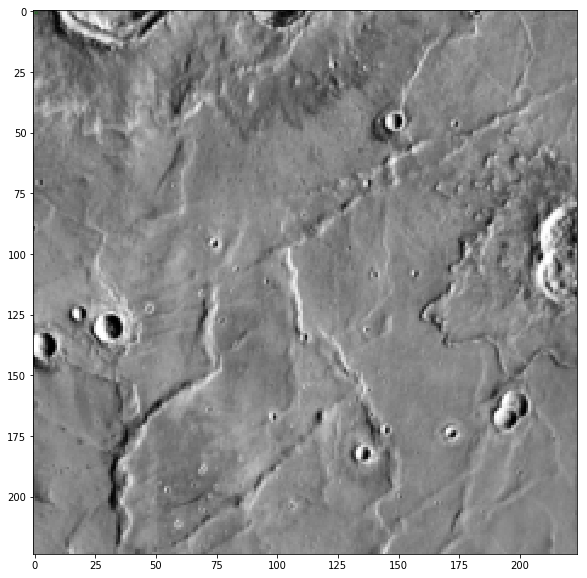

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(to_plot, cmap=plt.cm.gray)

# Draw the true boxes in green
for y, x, r in true_circles:
    ax.add_patch(plt.Circle(
        (x, y), r, color='green', fill=False, linewidth=2))
    
plt.show()